# Projeto para práticas em Machine Learning 1

Aqui praticarei: <br>

1.   PCA
2.   Validação Cruzada
3.   Regressão Linear

Importando os pacotes necessários

In [23]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

Gerando os dados de regressão sintéticos

In [63]:
X, y = make_regression(n_samples=500, n_features=12, n_informative=2, noise=0.2, random_state=42)

No primeiro teste usarei o train_test_split junto ao LinearRegression e a métrica MSE

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

0.04228733700044014

No resultado deste primeiro teste não ficou ruim, mas creio que pode ser melhorado.

No segundo teste usarei o RepeatedKFold ao LinearRegression e a métrica MSE

In [67]:
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=72)

In [68]:
models = {
    'model': [],
    'mse': []
}

for train_index, test_index in rkf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  lr = LinearRegression()
  lr.fit(X_train, y_train)

  y_pred = lr.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)

  models['model'].append(lr)
  models['mse'].append(mse)

In [69]:
min_mse_index = np.argmin(models['mse'])
best_model = models['model'][min_mse_index]
best_model

LinearRegression()

In [70]:
best_mse = models['mse'][min_mse_index]
best_mse

0.03020287143812593

In [71]:
mean_mse = np.mean(models['mse'])
mean_mse

0.0387197984045045

No resultado deste segundo teste ficou melhor que o primeiro, mas creio que pode ser melhorado ainda mais usando o PCA junto ao RepeatedKFold.

No terceiro teste usarei o RepeatedKFold, PCA ao LinearRegression e a métrica MSE

In [81]:
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X)

Após ter feito a redução em 5 compoentes, eu preciso verificar a melhor forma de selecionar esses componentes, existem alguns métodos como: Método do cotovelo e Critério de Kaiser.

Após verificar o melhor método do PCA junto ao LinearRegression e a métrica MSE usarei esse mesmo método com o RepeatedKFold.

Método do Cotovelo

In [82]:
var_cum_ = np.cumsum(pca.explained_variance_ratio_)
var_cum_

array([0.10435091, 0.20542073, 0.30194729, 0.39216093, 0.47871199,
       0.56401037, 0.64508245])

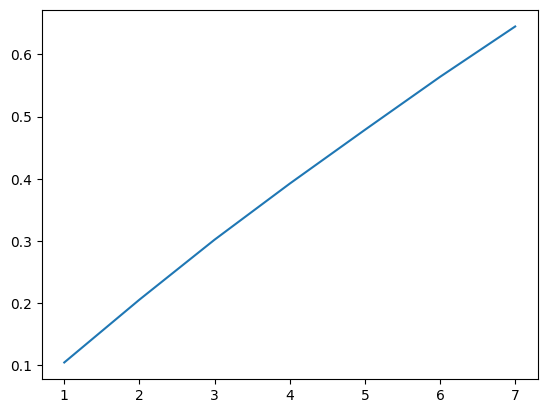

In [115]:
plt.plot(range(1, len(var_cum_)+1), var_cum_)
plt.xticks(range(1, len(var_cum_)+1))
plt.show()

Neste meu caso não apareceu a quina, logo devemos buscar por outros métodos

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.8, shuffle=True, random_state=52)

In [85]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [86]:
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse

1032.9368236191485

O pior MSE até o momento.

Critério de Kaiser

In [98]:
pca = PCA(n_components=7)
X_pca_bk = pca.fit_transform(X)

In [99]:
auto_v = pca.explained_variance_

n_components_kaiser = np.sum(auto_v > 1)
print(f'Número de componentes principais pelo critério de Kaiser: {n_components_kaiser}')

Número de componentes principais pelo critério de Kaiser: 6


In [100]:
pca = PCA(n_components=n_components_kaiser)
X_pca_ak = pca.fit_transform(X)

Testando antes do teste de kaiser

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_bk, y, train_size=0.8, shuffle=True, random_state=52)

In [103]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [104]:
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse

1032.9368236191485

Testando depois do teste de kaiser

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_ak, y, train_size=0.8, shuffle=True, random_state=52)

In [110]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [111]:
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse

1107.8833473024235

Neste caso critério de Kaiser mais piorou do que ajudou.

Já que foi observado que o PCA no método do cotovelo foi o melhor entre os dois, userei ele junto ao RepeatedKFold

In [117]:
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=72)

In [118]:
models = {
    'model': [],
    'mse': []
}

for train_index, test_index in rkf.split(X_pca):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  lr = LinearRegression()
  lr.fit(X_train, y_train)

  y_pred = lr.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)

  models['model'].append(lr)
  models['mse'].append(mse)

In [119]:
min_mse_index = np.argmin(models['mse'])
best_model = models['model'][min_mse_index]
best_model

LinearRegression()

In [120]:
best_mse = models['mse'][min_mse_index]
best_mse

0.03020287143812593

Mesmo que o PCA com o método do cotovelo foi ruim, com o RepeatedKFold foi o melhor MSE até o momento. Isso me deu vontade de testar com o critério de Kaiser.

In [124]:
models = {
    'model': [],
    'mse': []
}

for train_index, test_index in rkf.split(X_pca_ak):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  lr = LinearRegression()
  lr.fit(X_train, y_train)

  y_pred = lr.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)

  models['model'].append(lr)
  models['mse'].append(mse)

In [125]:
min_mse_index = np.argmin(models['mse'])
best_model = models['model'][min_mse_index]
best_model

LinearRegression()

In [126]:
best_mse = models['mse'][min_mse_index]
best_mse

0.03020287143812593

Entre o método de cotovelo e o critério de Kaiser não houve diferença alguma.

Neste contexto só usei o LinearRegression, mas se poderia continuar testando com outros modelos.